<a href="https://colab.research.google.com/github/andre-almd/Analisando-os-Dados-do-Airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Booking - *Portugal*

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1ApHNm3gI7O7j7Kby7EU9xZo7W1E8xB6t/view?usp=drive_link)



# A [Booking.com](https://www.booking.com/) é uma das **maiores plataformas de reservas de hospedagem do mundo**. E o mais impressionante? Ela **não é dona de nenhum hotel**!

Conectando viajantes a uma vasta rede de hotéis, pousadas, apartamentos e outras opções de hospedagem, a Booking.com revolucionou a forma como as pessoas planejam suas viagens, oferecendo **milhões de propriedades em todo o mundo**.

Fundada em 1996, a empresa já ajudou **milhões de viajantes** a encontrar a hospedagem perfeita, desbancando métodos tradicionais de reserva e se tornando referência no setor de turismo.

A Booking.com também disponibiliza dados e ferramentas para desenvolvedores através da [Booking.com API](https://developers.booking.com/), permitindo a integração de suas soluções de hospedagem em outros aplicativos e plataformas.

<center>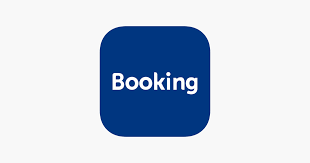</center>

**Neste *notebook*, vamos explorar dados de hospedagens em Lisboa e descobrir insights valiosos sobre tendências de viagem, preços e disponibilidade.**

**Dicionário das variáveis**

* **id** : identificação única para o anúncio
* **name** : nome do anúncio
* **host_id** : identificador único para o proprietário do imóvel
* **host_name** : nome do proprietário
* **neighbourhood_group** :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* **neighbourhood** : bairro da propriedade
* **latitude** : coordenada geográfica de latitude da propriedade
* **longitude** : coordenada geográfica de longitude da propriedade
* **room_type** : tipo de quarto oferecido para locação
* **price** : preço da diária do aluguel
* **minimum_nights** : quantidade mínima de noites para alugar o imóvel
* **number_of_reviews** : quantidade de avaliações que o imóvel tem
* **last_review** : data da última avaliação
* **reviews_per_month** : quantidade de avaliações por mês
* **calculated_host_listings_count** : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* **availability_365** : número de dias disponíveis para locação nos próximos 365 dias
* **number_of_reviews_ltm** : quantidade de avaliações nos últimos 12 meses
* **license** : número de registro do imóvel

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('booking_portugal.csv')

## Análise dos Dados


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

In [ ]:
df.shape

In [ ]:
# Descrição estatística dos dados
df.describe()

Com a análise estatística é verificado que alguns dados estão estranhos, como é o caso dos dados de preço e noites mínima para locação.
- Observe que a média do preço é €133. Aqui, 75% dos dados estão abaixo de €148 e o valor máximo é €9999.
- O mesmo ocorre com noites mínimas para locação. Média de 4 noites com valor máximo de 1000, sendo que 75% dos dados está abaixo 3 noites. **Algo não está certo aí.**

Esta discrepância pode ser causada por **outliers**.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

De início, pode ser observado que o dataset é bem extenso e com muitas informações.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

Os atributos com dados faltantes são poucos e parecem não serem os mais importantes do dataset. A quantidade de dados faltantes indica não ser tão significante para futuras análises.

### **Q3. Qual o tipo de distribuição das variáveis?**

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

Pelos gráficos de histogramas pode ser visto que:

- Há uma distribuição nos atributos de preço e noites mínimas para aluguel que indicam ter valores muito discrepantes nos dados, reforçando a análise estatística inicial;
- A quantidade de reviews também parece variar bastante sem um perfil uniforme para os dados. Sem maiores detalhes não há como ter uma informação mais detalhada aqui;
- A maioria dos imóveis possuem boa disponibilidade de locação para os próximos 365 dias.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print(f'A média dos preços de aluguel na região metropolitana de Lisboa é €{df.price.mean():.2f}')

A média acima considera todos os tipos de quartos.

Se agruparmos por tipo de quarto podemos ver que os quartos privados possuem a menor média de preços e o maior preço de aluguel é para os quartos de hotel.

In [ ]:
preco_medio = df.groupby('room_type').price.mean()
print(f'Média de preços de aluguel em Lisboa por tipo de quarto. Valores em Euros (€)\n{preco_medio}')

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=preco_medio.index, y=preco_medio.values)
ax.set_title('Preço médio por tipo de locação na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de locação')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(preco_medio.values.shape[0]):
  ax.text(i-.11, preco_medio.values[i]-10, f'€{round(preco_medio.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()

Como esperado, os quartos de hoteis são mais caros, seguidos pelos apartamentos ou casas completos.

No entanto, é interessante observar que os quartos compartilhados são mais caros, em média, do que os quartos privados.

**Será que é mais barato ir em Lisboa e ficar em quarto privado do que num quarto compartilhado em um hostel???**

### **Q5. Qual a correlação existente entre as variáveis**

In [ ]:
df.price.describe()

In [ ]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Display the correlation matrix
corr


In [ ]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

Observando a correlação do preço do aluguel com os outros atributos **não é observado correlações fortes**. No entanto, pode ser visto que a maior correlação é com a **longitude**, o que indica que a coordenada geográfica influencia mais no preço do aluguel do que as outras variáveis.

In [ ]:
print(f'Valor absoluto da correlação dos atributos com o preço de aluguel:')
corr.price.abs().sort_values(ascending=False)[1:]

### **Q6. Qual o tipo de imóvel mais disponível no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(f'Imóveis disponíveis por categoria:')
df.room_type.value_counts()

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(f'Em porcentagem (%), esses dados representam:')
df.room_type.value_counts()/df.shape[0]*100

In [ ]:
qt_room = df.room_type.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_room.index, y=qt_room.values)

ax.set_title('Quantidade de imóveis disponíveis por categoria na região de Lisboa', loc='left', fontsize=18)
ax.set_xlabel('Categoria')
#ax.set_ylabel('Quantidade')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_room.values.shape[0]-2):
  ax.text(i-.1, qt_room.values[i]-600, f'{round(qt_room.values[i], 2)}', fontsize=12, color='white')
for i in range(2, qt_room.values.shape[0]):
  ax.text(i-.1, qt_room.values[i], f'{round(qt_room.values[i], 2)}', fontsize=12)

plt.tight_layout()

**Mais de 76%** dos imóveis disponíveis são casas ou apartamentos completo.

A quantidade de quartos em hoteis ou quartos compartilhados não representa nem 2.5% de todas as opções disponíveis em Lisboa.

### **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
print(f'Existem {df.neighbourhood_group.unique().shape[0]} municíios registrados na região metropolitana de Lisboa no dataset.')

Na média, a cidade mais cara na região de Lisboa é **Sintra**. E a mais barata é **Amadora**.

In [ ]:
# ver preços por municípios, na média
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

In [ ]:
# Quantidade de dados das cidades mais caras
print(df.query('neighbourhood_group == "Sintra"').shape[0])
print(df.query('neighbourhood_group == "Cascais"').shape[0])

In [ ]:
# Quantidade de dados das cidades mais baratas
print(df.query('neighbourhood_group == "Amadora"').shape[0])
print(df.query('neighbourhood_group == "Odivelas"').shape[0])

In [ ]:
preco_por_regiao = df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

fi, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Preço médio dos imóveis na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom = False)
ax.grid(False)

#plt.xticks(rotation=45)
for i in range(preco_por_regiao.values.shape[0]):
  ax.text(preco_por_regiao.values[i]-10, i, f'€{round(preco_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.show()

**Sintra** é a cidade mais cara na região metropolitana de Lisboa para alugar um cômodo pelo Airbnb.

A cidade de **Lisboa**, que é **capital de Portugal** e da região metropolitana, é a maior do país e fica na **8ª posição** das mas caras do Airbnb.

**Será???**

In [ ]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', legend=True)
plt.title('Imóveis agrupados por cidade', loc='left', fontsize=18)
plt.legend(loc='best')
plt.show()

O aluguel mais caro nos dados é de €9999. Vamos ver as informações desse imóvel para análise mais detalhada:

- Diária de €9999 em um hostel com quarto compartilhado na terceira cidade mais cara da região de Lisboa. Não há comentários do imóvel. O Host possui 10 imóveis cadastrados.

In [ ]:
# Aluguel mais caro de €9999
df[df.price == 9999]

Olhando as informações do host pode ser percebido que os dados são do mesmo hostel e a média de valores é bem baixa. Logo, o valor da diária deve ter sido cadastrado errado. Há também um outro quarto com valor discrepante que também deve ter sido cadastrado errado.

In [ ]:
df[df.host_id == 415595835]

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='price')
ax.set_title('Boxplot do preço da diária, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Com o boxplot acima é visível que há muitos dados discrepantes para o preço médio da diária.

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print(f'A média de noites mínimas para locação é: {df.minimum_nights.mean():.2f}')

Ou seja, em média, os imóveis possuem um requisito mínimo de **4 noites para locação** do imóvel.

In [ ]:
# Gráfico de boxplot para ver a distribuição
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

É observado uma quantidade muito estranha de noites mínimas em alguns dados. Como um mês tem 30 dias, é estranho pensar que a quantidade mínima para locação de imóveis seja 100, 200 , 300 ou 1000 dias. **Não tem sentido.**

Desconsiderando dos dados os imóveis com noite míminas de locação acima de 30 dias, é possível ver o boxplot abaixo.

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df[df.minimum_nights <= 30], x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva, filtrado para 30 dias', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Ainda parece existir alguns outliers, mas fica difícil afirmar só pelo gráfico.

Vamos analisar os outliers pela medida do IQR.

## Análise dos outliers

### Dados de preço da diária

In [ ]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3-Q1

# Valores limites para corte
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

In [ ]:
# Criando uma cópia do dataset para limpeza
df_clean = df.copy()

# Vou limitar o valor mínimo em 0, já que pelo cáculo foi encontrado um valor negativo.
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)
# O valor máximo mantenho o cálculo de Q3 + 1.5*IQR
df_clean.drop(df_clean[df_clean.price > (Q3 + 1.5*IQR)].index, axis=0, inplace=True)

print(f'O dataset original possui {df.shape[0]} amostras')
print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

### Dados de quantidade mínima para locação

In [ ]:
Q1 = df.minimum_nights.quantile(0.25)
Q3 = df.minimum_nights.quantile(0.75)

IQR = Q3-Q1

# Valores limites para corte
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

In [ ]:
# Vou limitar o valor mínimo em 0, já que pelo cáculo foi encontrado um valor negativo.
df_clean.drop(df_clean[df_clean.minimum_nights <= 0].index, axis=0, inplace=True)
# O valor máximo mantenho o cálculo de Q3 + 1.5*IQR
df_clean.drop(df_clean[df_clean.minimum_nights > (Q3 + 1.5*IQR)].index, axis=0, inplace=True)

print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

## Como fica o dataset sem outliers???

In [ ]:
df_clean.describe()

Agora os dados estão dentro de uma padrão que parece esar ok.

Vamos ver o histograma novamente.

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(20,16));

In [ ]:
# Boxplot do preço médio da diãria com o dataset limpo
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df_clean, x='price')
ax.set_title('Boxplot do preço da diária, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

In [ ]:
#Boxplot da quantidade de noites mínima com o dataset limpo
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df_clean, x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Com a análise acima pode ser visto uma **melhora significativa nas variações dos dados**, agora mais coerentes sem indícios de dados fora do padrão.

Os valores de outliers no boxplot de df_clean não podem ser considerados como fora de contexto, pois é um novo boxplot com os dados já filtrados anteriormente.

Agora, vamos refazer as análises gráficas e verificar se o resultado permanece o mesmo.

In [ ]:
corr = df_clean.select_dtypes(include=['number']).corr()

print(f'Valor absoluto da correlação dos atributos com o preço de aluguel:')
corr.price.abs().sort_values(ascending=False)[1:]

As correações continuam fracas, mas agora a maior correlação com o preço da locação é com a quantidade de locações de um mesmo host, seguido pela disponibilidade futura e o número de comentários.

**As correações ainda são fracas, mas há mudança no padrão após a retirada de outiers é interessante.**

In [ ]:
# Análise para quantidade de locações disponíveis
qt_room = df_clean.room_type.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_room.index, y=qt_room.values)

ax.set_title('Quantidade de imóveis disponíveis por categoria na região de Lisboa', loc='left', fontsize=18)
ax.set_xlabel('Categoria')
#ax.set_ylabel('Quantidade')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_room.values.shape[0]-2):
  ax.text(i-.1, qt_room.values[i]-600, f'{round(qt_room.values[i], 2)}', fontsize=12, color='white')
for i in range(2, qt_room.values.shape[0]):
  ax.text(i-.1, qt_room.values[i], f'{round(qt_room.values[i], 2)}', fontsize=12)

plt.tight_layout()

In [ ]:
# Análise do preço médio por tipo de locação
preco_medio = df_clean.groupby('room_type').price.mean()

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=preco_medio.index, y=preco_medio.values)
ax.set_title('Preço médio por tipo de locação na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de locação')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(preco_medio.values.shape[0]):
  ax.text(i-.11, preco_medio.values[i]-10, f'€{round(preco_medio.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()

Opaaa... temos uma mudança.

Agora o aluguel mais caro é para quartos de hoteis, seguido de casa/apartamento completo, quarto privado e quarto compartilhado. **Faz total sentido!**

In [ ]:
# Análise ds preço médio por cidade
preco_por_regiao = df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

fi, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Preço médio dos imóveis na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom = False)
ax.grid(False)

#plt.xticks(rotation=45)
for i in range(preco_por_regiao.values.shape[0]):
  ax.text(preco_por_regiao.values[i]-10, i, f'€{round(preco_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.show()

Opaaa... mais uma mudança interessante.

Agora os dados estão bem diferentes e parecem fazer sentido.

**A cidade mais cara é Cascais seguida de Lisboa.**

Bem... **Lisboa é a capital de Portugal e a maior cidade de país**. **Cascais é uma cidade turística costeira em Portugal, a oeste de Lisboa**. É conhecida por suas praias de areia e marina movimentada.

Sintra não é uma cidade litorânea, há uma certa lógica em Cascais ser a cidade mais cara e não Sintra.

## Conclusões


A **análise dos dados do Airbnb** foi realiazada para as cidades da **região metropolitana de Lisboa** que é uma das sete regiões de Portugal, constituída por 118 freguesias (bairros), compreendida em 18 municípios.

- O dataset da região metropolitana de Lisboa é bem extenso e possui alguns dados que indicam conter outliers;
- É possível verificar que a maior parte dos imóveis possuem boa taxa de disponibilidade para o próximo ano;
- O dataset possui vários outliers que altera o resultado correto dos dados;
- As correlações entre as variáveis para determinar o preço de locação é bem fraca, no entanto o resultado encontrado após a remoção de outliers faz sentido;
- O dados de preço do aluguel parecem conter outliers, pois a média original é €133.00, com 75% dos dados abaixo de €148.00 e valor máximo de €9999;
- Os dados de quantidade mínima de noites para alugar um imóvel tem grande indícios de estarem com outliers, pois a média original é 4.2 noites com 75% dos dados abaixo de 3 noites. O valor máximo registrado é 1000 noites;
- A região metropolitana de Lisboa é uma região onde a grande maioria de locaçÕes pelo Airbnb é de casa ou apartamentos completos e quartos privados;
- Os alugueis mais baratos são os quartos compartilhados, porém há poucos na região.
- Para ficar em um quarto privado, um turista não irá pagar muito caro e encontrará um local com certa facilidade, pois há muitos quartos disponíveis.
